# Árvores de Decisão - Random Forest - Crédito Bancário

Disponível em: https://mkmanu.wordpress.com/2014/08/28/modelling-credit-score-in-r-part-1/

Classe:
Credito: 0 - não concedido, 1 - concedido

Atributos:

duraçao_emprestimo: em meses

tempo_de_residencia: em anos

Quantidade_emprestimo: em Reais

Idade: em anos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Calcular o tempo de execução 
from datetime import datetime 

start_time = datetime.now() 

In [3]:
df = pd.read_csv("credito.csv")
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Credito,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
0,0,6,4,1169,67
1,1,48,2,5951,22
2,0,12,3,2096,49
3,0,42,4,7882,45
4,1,24,4,4870,53


In [4]:
print("tamanho do dataset: ",len(df))

tamanho do dataset:  1000


In [5]:
# Resumo estatístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credito,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duracao_emprestimo,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
tempo_de_residencia,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Quantidade_Emprestimo,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
idade,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0


In [6]:
# Correlação
df.corr()

,Credito,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
Credito,1.000000,0.214927,0.002967,0.154739,-0.091127
duracao_emprestimo,0.214927,1.000000,0.034067,0.624984,-0.036136
tempo_de_residencia,0.002967,0.034067,1.000000,0.028926,0.266419
Quantidade_Emprestimo,0.154739,0.624984,0.028926,1.000000,0.032716
idade,-0.091127,-0.036136,0.266419,0.032716,1.000000


In [7]:
df.corr()['Credito']

Credito                  1.000000
duracao_emprestimo       0.214927
tempo_de_residencia      0.002967
Quantidade_Emprestimo    0.154739
idade                   -0.091127
Name: Credito, dtype: float64

In [8]:
df.Credito.value_counts() # Credito: 0 - não concedido, 1 - concedido

0    700
1    300
Name: Credito, dtype: int64

## X e y

In [9]:
# Gera os dados de treino

X = df.loc[:,["duracao_emprestimo", "tempo_de_residencia", "Quantidade_Emprestimo", "idade"]]
y = df.loc[:,["Credito"]].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .3)

In [10]:
print(len(X_train))
print(len(X_test))

700
300


## Modelo

In [11]:
# Criação do modelo - Arvore de Decisao
clf = DecisionTreeClassifier()

In [12]:
print(clf)

DecisionTreeClassifier()


In [13]:
modelo = clf.fit(X_train, Y_train)
previsoes = modelo.predict(X_test)

In [14]:
print (confusion_matrix(Y_test, previsoes))

[[143  62]
 [ 58  37]]


In [15]:
print (accuracy_score(Y_test, previsoes))

0.6


## colocar em escala

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std[:3]

array([[ 1.8208527 , -0.78968123,  2.17967522,  1.68691198],
       [ 0.28003712,  1.02270192, -0.0145868 , -0.84895244],
       [-0.74717327, -0.78968123, -0.76254895, -0.76150884]])

In [17]:
X_test_std[:3]

array([[-0.918375  , -1.69587281, -0.41445887, -0.84895244],
       [-1.00397587, -0.78968123, -0.60144941, -0.06196004],
       [ 0.28003712, -1.69587281, -0.70609219, -0.93639604]])

In [18]:
modelo = clf.fit(X_train_std, Y_train)
previsoes = modelo.predict(X_test_std)
print (confusion_matrix(Y_test, previsoes))
print (accuracy_score(Y_test, previsoes))

[[147  58]
 [ 59  36]]
0.61


In [ ]:
[[143  62]
 [ 58  37]]

## Utilizando o Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [19]:
clf = RandomForestClassifier(n_estimators  = 1000)

Os 4 principais parâmetros em Modelos de Random Forest são:

n_estimators - quanto maior, melhor!

max depth - o padrão é 'none' e nesse caso árvores completas são criadas. Ajustando esse parâmetro pode ajudar a evitar overfitting.

max_features - diferentes valores devem ser testados, pois este parâmetro impacta na forma como os modelos RF distribuem os atributos pelas árvores.

criterion - define a forma como o algoritmo fará a divisão dos atributos e a classificação dos nós em cada árvore.

In [20]:
# Construção do modelo
modelo = clf.fit(X_train, Y_train.ravel())

In [21]:
modelo

RandomForestClassifier(n_estimators=1000)

In [22]:
#previsoes = modelo.predict(XTest)
# Create random forest classifier instance
predictions = modelo.predict(X_test)

In [23]:
#modelo.score(XTest, predictions)
accuracy_score(Y_test, predictions)

0.6633333333333333

In [24]:
print ("Train Accuracy :: ", accuracy_score(Y_train, modelo.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(Y_test, predictions))
print (" Confusion matrix :: \n ", confusion_matrix(Y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.6633333333333333
 Confusion matrix :: 
  [[170  35]
 [ 66  29]]


In [ ]:
[[143  62]
 [ 58  37]]

### previsao de uma instancia

In [25]:
instance = X_train[0:1]
instance

,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
808,42,2,9283,55


In [26]:
print(modelo.predict(instance))

[0]


In [27]:
print(modelo.predict_proba(instance))

[[0.871 0.129]]


#### x% de Negar crédito e y% de Aceitar Crédito

## Extraindo a Importância dos Atributos

In [28]:
# Extraindo a importância
atributos = ["duracao_emprestimo", "tempo_de_residencia", "Quantidade_Emprestimo", "idade"]
importances = modelo.feature_importances_
print(atributos)
importances

['duracao_emprestimo', 'tempo_de_residencia', 'Quantidade_Emprestimo', 'idade']


array([0.18178168, 0.09795033, 0.447082  , 0.27318599])

In [29]:
df = pd.DataFrame(data=[atributos, list(importances)])
df = df.T
df.columns = ['atributos', 'importância']
df = df.sort_values('importância', ascending=False)
df

,atributos,importância
2,Quantidade_Emprestimo,0.447082
3,idade,0.273186
0,duracao_emprestimo,0.181782
1,tempo_de_residencia,0.0979503


## plotar os atributos e suas importancias

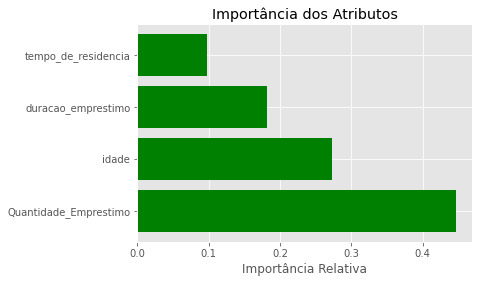

In [30]:
plt.figure(1)
plt.style.use('ggplot')
plt.yticks(np.arange(len(df)), df.atributos)
plt.title('Importância dos Atributos')
plt.barh(range(len(df)), df['importância'], color = 'g', align = 'center')
#plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

# Métodos Ensemble

## Bagging 1

Bagging é usado para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de diferentes subsets no dataset de treino.

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Um classificador Bagging é um meta-estimador ensemble que faz o fit de classificadores base, cada um em subconjuntos aleatórios do conjunto de dados original e, em seguida, agrega suas previsões individuais (por votação ou por média) para formar uma previsão final.

Tal meta-estimador pode tipicamente ser usado como uma maneira de reduzir a variância de um estimador (por exemplo, uma árvore de decisão), introduzindo a randomização em seu procedimento de construção e fazendo um ensemble (conjunto) a partir dele.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Construção do Classificador
estimador_base = KNeighborsClassifier()
#estimador_base =  DecisionTreeClassifier()
bagging = BaggingClassifier(estimador_base, max_samples = 0.5, max_features = 0.5)

In [33]:
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

### cross_val_score - Evaluate a score by cross-validation

In [34]:
# Score do modelo
scores = cross_val_score(bagging, X, y.ravel())

In [35]:
# Média do score
mean = scores.mean()
mean

0.6839999999999999

In [36]:
print(scores)

[0.705 0.675 0.67  0.665 0.705]


In [ ]:
Test Accuracy  ::  0.6633333333333333
 Confusion matrix :: 
  [[170  35]
 [ 66  29]]

## Bagging 2

In [37]:
# Construção do Classificador
# n_estimators  = 5000
bagging = BaggingClassifier(RandomForestClassifier(n_estimators  = 300), max_samples = 0.5, max_features = 0.5)

In [38]:
bagging

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=300),
                  max_features=0.5, max_samples=0.5)

In [39]:
%%time
# Score do modelo
scores = cross_val_score(bagging, X, y.ravel())

CPU times: user 39.2 s, sys: 1.24 s, total: 40.5 s
Wall time: 53.4 s


In [40]:
print(scores)

[0.71  0.74  0.68  0.69  0.695]


In [41]:
# Média do score
mean = scores.mean()
mean

0.703

In [ ]:
Test Accuracy  ::  0.6633333333333333

## Extremely Randomized Trees (ExtraTrees)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
# Cria o classificador
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.67  0.595 0.63  0.605 0.615]
0.623


In [44]:
clf = RandomForestClassifier(n_estimators = 20, max_depth = None, min_samples_split = 2, 
                             random_state = 0)
scores = cross_val_score(clf, X, y.ravel())
mean = scores.mean()
print(scores)
print(mean)

[0.695 0.7   0.675 0.685 0.685]
0.6880000000000001


In [45]:
clf = ExtraTreesClassifier(n_estimators = 20, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y.ravel())
mean = scores.mean()
print(scores)
print(mean)

[0.685 0.71  0.67  0.66  0.66 ]
0.677


## Adaboost

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Um classificador AdaBoost é um meta-estimador que começa ajustando um classificador no conjunto de dados original e depois ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados para que os classificadores subsequentes se concentrem mais em casos difíceis.

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
# Construindo o estimador base
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)
estim_base.fit(X_train, Y_train)
print(estim_base.score(X_test, Y_test))
estim_base_err = 1.0 - estim_base.score(X_test, Y_test)
estim_base_err

0.6666666666666666


0.33333333333333337

In [49]:
ada_clf = AdaBoostClassifier(base_estimator = estim_base, 
                                  learning_rate = 0.07, 
                                  n_estimators = 400, 
                                  algorithm = "SAMME")

In [50]:
ada_clf.fit(X_train, Y_train.ravel())

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.07, n_estimators=400)

In [51]:
scores = cross_val_score(ada_clf, X_test, Y_test.ravel())
print(scores)
means = scores.mean()
print(means)

[0.71666667 0.71666667 0.68333333 0.68333333 0.71666667]
0.7033333333333334


# Gradiente Boosting Classifier

Gradient Boosting = Gradient Descent + Boosting. 

Basicamente 3 etapas são realizadas na construção do modelo:

1- Gera um regressor

2- Computa o erro residual

3- Aprende a prever o resíduo



Parâmetros mais importantes:

Número de árvores de regressão (n_estimators)

Profundidade de cara árvore (max_depth)

loss function (loss)

Como funciona o Gradient Boosting: <br><br>
1 - Realiza um conjunto de previsões (y)

2- Calcula o erro das previsões ( j )

3- Tenta ajustar y reduzindo o erro (através de alpha)

4- Para cada estimador base, é estimado o gradiente da função de perda

5- Estimadores subsequentes estimam o erro residual dos estimadores anteriores

6- Aplica o Gradient Descent para reduzir j

7- Soma os resultados dos estimadores, dando peso a cada passo de acordo com o valor de alfa

http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting

Gradient Boosting Classifier
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Cria o classificador
est = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.001)

# Cria o modelo
est.fit(X_train, Y_train.ravel())

# Previsões das classes (labels)
pred = est.predict(X_test)

# Score nos dados de teste (Acurácia)
acc = est.score(X_test, Y_test.ravel())
print('Acurácia: %.4f' % acc)

# Previsão das probabilidades das classes
est.predict_proba(X_test)[0]

Acurácia: 0.7000


array([0.76638108, 0.23361892])

## XGBoost - Algoritmo Ensemble Mais Eficiente

### Regularização (controla a complexidade, Reduz o Overfitting) - Penaliza o erro ###
### Objective Function : Training Loss + Regularization ###
### Usa processamento paralelo (Roda no Spark) ###

## eXtreme Gradient Boosting (XGBoost)

https://xgboost.readthedocs.io/en/latest/

O XGBoost é uma biblioteca otimizada de aumento de gradiente distribuído, <br>
Projetado para ser altamente eficiente, flexível e portátil. <br>
Ele implementa algoritmos de aprendizado de máquina sob a estrutura Gradient Boosting. <br>
O XGBoost fornece um aumento de árvore paralelo (também conhecido como GBDT, GBM) que resolve muitos problemas de Ciência de Dados de maneira rápida e precisa. <br>
O mesmo código é executado no ambiente distribuído (Hadoop, SGE, MPI) e <br>
pode resolver problemas com dados de bilhões de registros.<br>

### Amplamente usado nas competições do Kaggle.<br>
https://www.kaggle.com/fanrenlangzi/xgboost (Classificação - Public Score = 0.96571) <br>
https://www.kaggle.com/ksashok/very-basic-xgboost (Classificação - Public Score = 0.94428) <br>
https://www.kaggle.com/valencar/competi-o-dsa-modelo-xgboost (Regressão - Public Score =  9.4688110) <br>
https://www.kaggle.com/valencar/kernel-vladimiralencar-lana-v05 (Regressão - Public Score = 0.48740)

In [ ]:
### Instalar no prompt de comando
#!conda install -y -c conda-forge xgboost

In [53]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [64]:
model = XGBClassifier(n_estimators = 1500, learning_rate = 0.001)
model.fit(X_train, Y_train.ravel())
# make predictions for test data
y_pred = model.predict(X_test)

In [65]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.33%


## XGBoost - Exemplo 2

In [66]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
# load data
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.columns = [ "preg", "glucose", "Diastolic", "Triceps", "insulin", "BDI", "ped_func", "Age", "Class"]
dataset.head()

,preg,glucose,Diastolic,Triceps,insulin,BDI,ped_func,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [68]:
len(dataset)

767

In [69]:
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [70]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [71]:
# Bagging
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)
# Score do modelo
scores = cross_val_score(bagging, X, Y.ravel())
print("Bagging")
means = scores.mean()
print("Accuracy: %.2f%%" % (means * 100.0))

Bagging
Accuracy: 73.92%


In [72]:
# XGBoost
model = XGBClassifier(n_estimators = 1000, learning_rate = 0.001)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("XGBoost")
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBoost
Accuracy: 76.77%


In [ ]:
time_elapsed = datetime.now() - start_time 

print('Tempo Total de Processamento (hh:mm:ss.ms) {}'.format(time_elapsed))